Dataset Shape: (48842, 15)
   age   workclass  fnlwgt      education  education-num       marital-status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country   class  
0            

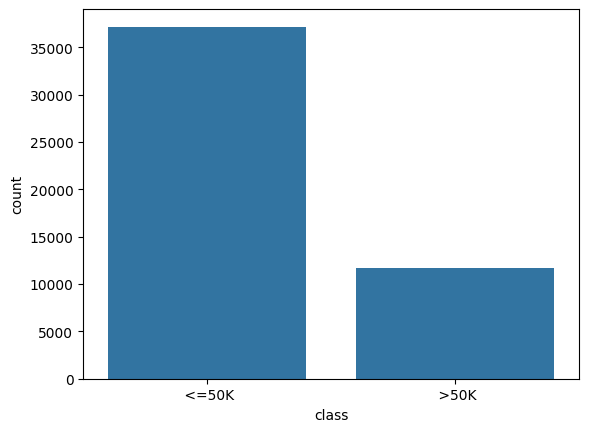

ValueError: could not convert string to float: ' Private'

In [ ]:
# Task 5: Credit Card Fraud Detection

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
url = "https://www.openml.org/data/get_csv/1595261/creditcard.csv"
df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
print(df.head())

# Check class distribution
sns.countplot(x="class", data=df)
plt.show()

# Features and Target
X = df.drop("class", axis=1)
y = df["class"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Task
Explain the error in the selected code, fix it if possible, and incorporate the changes into the existing code. If not, diagnose the error.

## Identify categorical features

### Subtask:
Determine which columns contain non-numeric values.


**Reasoning**:
Iterate through the columns of the dataframe `df`, check the data type of each column, identify non-numeric columns (object or categorical dtype), store their names in a list, and print the list.



## Handle categorical features

### Subtask:
Apply one-hot encoding or another appropriate technique to convert categorical features into numerical features.


**Reasoning**:
Apply one-hot encoding to categorical features and display the resulting DataFrame.



**Reasoning**:
The previous attempt to create a DataFrame from the encoded data failed because the number of columns in the data did not match the number of generated column names. This is likely due to an issue with how the column names are being extracted after the `ColumnTransformer` is applied. The `ColumnTransformer` outputs a sparse matrix by default when using `OneHotEncoder`. I need to handle this sparse matrix correctly and ensure the column names align with the output shape. I will convert the output to a dense array before creating the DataFrame and regenerate the column names.



## Handle missing values

### Subtask:
Check for and handle any missing values that might exist in the dataset after encoding.


**Reasoning**:
Check for missing values in the `df_encoded` DataFrame.



## Train-test split

### Subtask:
Split the preprocessed data into training and testing sets.


**Reasoning**:
Split the encoded data into training and testing sets.



**Reasoning**:
Scale the numerical features in the training and testing sets using StandardScaler.



## Model training and evaluation

### Subtask:
Train the RandomForestClassifier model on the preprocessed data and evaluate its performance.


**Reasoning**:
Train the RandomForestClassifier model, make predictions, and evaluate its performance using classification report and confusion matrix.

